In [1]:
import numpy as np
import pandas as pd

# Cleaning tools

Some data cleaning tools for analysis.

## Missing data

`isna`, `dropna`, and `fillna`.

In [2]:
ser = pd.Series(['Piggy', 'Is', None, np.nan])
ser

0    Piggy
1       Is
2     None
3      NaN
dtype: object

In [3]:
ser.isna()

0    False
1    False
2     True
3     True
dtype: bool

In [4]:
ser.fillna('Napoleon')

0       Piggy
1          Is
2    Napoleon
3    Napoleon
dtype: object

In [5]:
ser.dropna()

0    Piggy
1       Is
dtype: object

## Duplicate data

In [6]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two", "one"],
                     "k2": [1, 1, 2, 4, 3, 3, 4, 1]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,4
4,one,3
5,two,3
6,two,4
7,one,1


In [7]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
dtype: bool

In [8]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,4
4,one,3
5,two,3


In [9]:
data.drop_duplicates(subset='k2')

,k1,k2
0,one,1
2,one,2
3,two,4
4,one,3


## `map`

Either a dictionary or a function for element-wise transformations.

In [10]:
eng_to_esp = {'one': 'uno', 'two': 'dos'}
data['k1'].map(eng_to_esp)

0    uno
1    dos
2    uno
3    dos
4    uno
5    dos
6    dos
7    uno
Name: k1, dtype: object

In [11]:
data['k1'].map(lambda x: eng_to_esp[x])

0    uno
1    dos
2    uno
3    dos
4    uno
5    dos
6    dos
7    uno
Name: k1, dtype: object

## `replace`

Sometimes data has some other sentinel values other than NA for missing values, such as `-inf`. `isna` cannot detect them. `replace` for a rescue.

`to_replace` argument also takes regex, list, Series, dict, etc.

In [12]:
ser2 = pd.Series(np.random.standard_normal(10))
ser2[2:5] = -np.inf
ser2[8] = np.inf
ser2

0    1.066583
1    0.165496
2        -inf
3        -inf
4        -inf
5    0.788464
6    0.603581
7   -0.836028
8         inf
9   -1.144719
dtype: float64

In [13]:
ser2.mean()

/home/kappa/miniforge3/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


nan

In [14]:
ser2.isna()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [15]:
ser2.replace([-np.inf, np.inf], 0)

0    1.066583
1    0.165496
2    0.000000
3    0.000000
4    0.000000
5    0.788464
6    0.603581
7   -0.836028
8    0.000000
9   -1.144719
dtype: float64

## Rename

Renaming index and columns are easy.

In [16]:
data.rename(index={0: 'first', 1: 'second'},
            columns=str.capitalize)

,K1,K2
first,one,1
second,two,1
2,one,2
3,two,4
4,one,3
5,two,3
6,two,4
7,one,1


In [17]:
data.rename(index=lambda x: x*10,
            columns=str.capitalize)

,K1,K2
0,one,1
10,two,1
20,one,2
30,two,4
40,one,3
50,two,3
60,two,4
70,one,1


## Bin

Binning into categories from continuous variables.

More on https://wesmckinney.com/book/data-cleaning#prep_discretization

Why change from continuous to discrete? To divide into more meaningful categories, such as age groups. Then, we can create stratefied sampling to sample a test dataset for machine learning algorithms. 

In [18]:
np.random.seed(42)
ages = np.random.normal(40, scale=40, size=(100)).astype(int)
ages[:5]

array([ 59,  34,  65, 100,  30])

In [19]:
ages.mean(), ages.std()

(35.49, 35.89052660521993)

In [20]:
bins = [10, 18, 25, 40, 60, 100]
age_cat = pd.cut(ages, bins)
age_cat

[(40, 60], (25, 40], (60, 100], (60, 100], (25, 40], ..., NaN, (40.0, 60.0], (40.0, 60.0], (25.0, 40.0], (25.0, 40.0]]
Length: 100
Categories (5, interval[int64, right]): [(10, 18] < (18, 25] < (25, 40] < (40, 60] < (60, 100]]

In [21]:
age_cat.value_counts()

(10, 18]      9
(18, 25]      9
(25, 40]     17
(40, 60]     22
(60, 100]    19
Name: count, dtype: int64

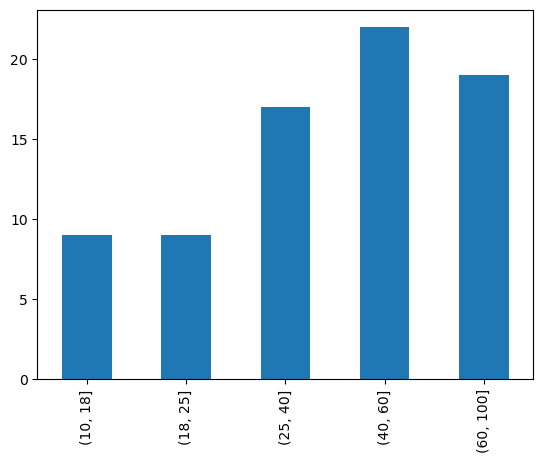

In [22]:
age_cat.value_counts().plot.bar();

Into 4 quarters.

In [23]:
pd.qcut(ages, 4)

[(56.0, 114.0], (15.0, 34.5], (56.0, 114.0], (56.0, 114.0], (15.0, 34.5], ..., (-64.001, 15.0], (34.5, 56.0], (34.5, 56.0], (34.5, 56.0], (15.0, 34.5]]
Length: 100
Categories (4, interval[float64, right]): [(-64.001, 15.0] < (15.0, 34.5] < (34.5, 56.0] < (56.0, 114.0]]

## Outliers

How to cap outliers? Numpy has `clip`, and pytorch has `clamp`.

In [24]:
ages.clip(20, 40)

array([40, 34, 40, 40, 30, 30, 40, 40, 21, 40, 21, 21, 40, 20, 20, 20, 20,
       40, 20, 20, 40, 30, 40, 20, 20, 40, 20, 40, 20, 28, 20, 40, 39, 20,
       40, 20, 40, 20, 20, 40, 40, 40, 35, 27, 20, 20, 21, 40, 40, 20, 40,
       24, 20, 40, 40, 40, 20, 27, 40, 40, 20, 32, 20, 20, 40, 40, 37, 40,
       40, 20, 40, 40, 38, 40, 20, 40, 40, 28, 40, 20, 31, 40, 40, 20, 20,
       20, 40, 40, 20, 40, 40, 40, 20, 26, 24, 20, 40, 40, 40, 30])

## Random sampling

Maybe useful for data augmentation purposes? Or for dividing a dataset into train/test sets.

In [25]:
data.sample(3)

,k1,k2
6,two,4
3,two,4
1,two,1


In [26]:
data.iloc[np.random.permutation(3)]

,k1,k2
1,two,1
0,one,1
2,one,2


## Dummy variables

In [27]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,4
4,one,3
5,two,3
6,two,4
7,one,1


In [28]:
pd.get_dummies(data['k1'], dtype=float, prefix='k1')

,k1_one,k1_two
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
5,0.0,1.0
6,0.0,1.0
7,1.0,0.0


In [29]:
pd.get_dummies(data['k1'], prefix='k1')

,k1_one,k1_two
0,True,False
1,False,True
2,True,False
3,False,True
4,True,False
5,False,True
6,False,True
7,True,False


In [30]:
pd.get_dummies(data['k1'], prefix='k1')

,k1_one,k1_two
0,True,False
1,False,True
2,True,False
3,False,True
4,True,False
5,False,True
6,False,True
7,True,False


Cool trick on string manipulation: Genres coupled into one column, but it would be better to separate them into different columns. Using `str.get_dummies`.

In [31]:
movies = pd.read_table('../data/movies.dat', sep='::', header=None,
                       names=['movie_id', 'title', 'genres'], engine='python')
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [32]:
movies['genres'].str.get_dummies('|')

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Dummies and bins

Using the age category we have from earlier, we can create a dummy variables.

In [33]:
age_cat

[(40, 60], (25, 40], (60, 100], (60, 100], (25, 40], ..., NaN, (40.0, 60.0], (40.0, 60.0], (25.0, 40.0], (25.0, 40.0]]
Length: 100
Categories (5, interval[int64, right]): [(10, 18] < (18, 25] < (25, 40] < (40, 60] < (60, 100]]

In [34]:
pd.get_dummies(age_cat)

,"(10, 18]","(18, 25]","(25, 40]","(40, 60]","(60, 100]"
0,False,False,False,True,False
1,False,False,True,False,False
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,True,False,False
...,...,...,...,...,...
95,False,False,False,False,False
96,False,False,False,True,False
97,False,False,False,True,False
98,False,False,True,False,False


## pandas extension data types

pandas has its own data types to deal with real-world data. 

 - `pd.NA`
 - `pd.CategoricalDtype`

In [35]:
pd.NA

<NA>

In [36]:
pd.CategoricalDtype

pandas.core.dtypes.dtypes.CategoricalDtype

## String functions

pandas string functions skip NAN values. (No error)

In [37]:
ser3 = pd.Series({'Piggy': '555-6465', 'Kitty': '555-6369', 'Puppy': '555-2275', 'Shadow': np.nan, 'Dummy': pd.NA})
ser3

Piggy     555-6465
Kitty     555-6369
Puppy     555-2275
Shadow         NaN
Dummy         <NA>
dtype: object

In [38]:
ser3.isna()

Piggy     False
Kitty     False
Puppy     False
Shadow     True
Dummy      True
dtype: bool

In [39]:
ser3.str.contains('555')

Piggy     True
Kitty     True
Puppy     True
Shadow     NaN
Dummy     <NA>
dtype: object

Regex for the phone number matching.

In [40]:
pattern = r'([0-9]+)-([0-9]+)'
ser3.str.findall(pattern)

Piggy     [(555, 6465)]
Kitty     [(555, 6369)]
Puppy     [(555, 2275)]
Shadow              NaN
Dummy              <NA>
dtype: object

In [41]:
matches = ser3.str.findall(pattern).str[0]
matches

Piggy     (555, 6465)
Kitty     (555, 6369)
Puppy     (555, 2275)
Shadow            NaN
Dummy            <NA>
dtype: object

In [42]:
matches.str.get(1)

Piggy     6465
Kitty     6369
Puppy     2275
Shadow     NaN
Dummy     <NA>
dtype: object

`str` basically turns it into a string, and any string operation can be performed.

In [43]:
ser3.str[2:]

Piggy     5-6465
Kitty     5-6369
Puppy     5-2275
Shadow       NaN
Dummy       <NA>
dtype: object

### `extract`

Cool trick to turn it into a dataframe.

In [44]:
ser3.str.extract(pattern)

,0,1
Piggy,555,6465
Kitty,555,6369
Puppy,555,2275
Shadow,NaN,NaN
Dummy,NaN,NaN


## Categorical data

In [45]:
ser4 = pd.Series(['Bacon', 'Eggs', 'Bacon'] * 3)
ser4

0    Bacon
1     Eggs
2    Bacon
3    Bacon
4     Eggs
5    Bacon
6    Bacon
7     Eggs
8    Bacon
dtype: object

In [46]:
ser4.unique()

array(['Bacon', 'Eggs'], dtype=object)

In [47]:
ser4.value_counts()

Bacon    6
Eggs     3
Name: count, dtype: int64

This data is more efficiently stored as the following. It is easy to remember them as keys taking values.

In [48]:
vals = pd.Series([0, 1, 0] * 3)
vals

0    0
1    1
2    0
3    0
4    1
5    0
6    0
7    1
8    0
dtype: int64

In [49]:
keys = pd.Series(['Bacon', 'Eggs'])
keys

0    Bacon
1     Eggs
dtype: object

In [50]:
keys.take(vals)

0    Bacon
1     Eggs
0    Bacon
0    Bacon
1     Eggs
0    Bacon
0    Bacon
1     Eggs
0    Bacon
dtype: object

### Categorical extension type

In [51]:
# Setup dataframe
fruits = ['apple', 'orange', 'apple', 'apple'] * 2
N = len(fruits)
rng = np.random.default_rng(seed=12345)
df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                   'count': rng.integers(3, 15, size=N),
                   'weight': rng.uniform(0, 4, size=N)},
                   columns=['basket_id', 'fruit', 'count', 'weight'])
df

,basket_id,fruit,count,weight
0,0,apple,11,1.564438
1,1,orange,5,1.331256
2,2,apple,12,2.393235
3,3,apple,6,0.746937
4,4,apple,5,2.691024
5,5,orange,12,3.767211
6,6,apple,10,0.992983
7,7,apple,11,3.795525


In [52]:
fruit_cat = df['fruit'].astype('category')
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

`fruit_cat` is a series. To get the values for `fruit_cat`, we use `array` attribute.

In [53]:
c = fruit_cat.array
type(c)

pandas.core.arrays.categorical.Categorical

In [54]:
c

['apple', 'orange', 'apple', 'apple', 'apple', 'orange', 'apple', 'apple']
Categories (2, object): ['apple', 'orange']

In [55]:
c.categories

Index(['apple', 'orange'], dtype='object')

In [56]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [57]:
dict(enumerate(c.categories))

{0: 'apple', 1: 'orange'}

#### Creating categories from data.

In [58]:
pd.Categorical(['a', 'b', 'c', 'a', 'b'])

['a', 'b', 'c', 'a', 'b']
Categories (3, object): ['a', 'b', 'c']

#### From categories and codes into data

In [59]:
categories = ['a', 'b', 'c']
codes = [0, 1, 2, 0, 2, 2]
pd.Categorical.from_codes(codes, categories)

['a', 'b', 'c', 'a', 'c', 'c']
Categories (3, object): ['a', 'b', 'c']

#### Ordered categories

In [60]:
pd.Categorical.from_codes(codes, categories, ordered=True)

['a', 'b', 'c', 'a', 'c', 'c']
Categories (3, object): ['a' < 'b' < 'c']

In [61]:
pd.Categorical.from_codes(codes, categories).as_ordered()

['a', 'b', 'c', 'a', 'c', 'c']
Categories (3, object): ['a' < 'b' < 'c']

### Computations with Categories

In [62]:
rng = np.random.default_rng(0)
draws = rng.standard_normal(1000)
draws[:5]

array([ 0.12573022, -0.13210486,  0.64042265,  0.10490012, -0.53566937])

In [63]:
bins = pd.qcut(draws, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
bins

['Q3', 'Q2', 'Q4', 'Q3', 'Q2', ..., 'Q4', 'Q2', 'Q4', 'Q2', 'Q2']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [64]:
bins.codes[:5]

array([2, 1, 3, 2, 1], dtype=int8)

In [65]:
bins = pd.Series(bins, name='quantile')
bins

0      Q3
1      Q2
2      Q4
3      Q3
4      Q2
       ..
995    Q4
996    Q2
997    Q4
998    Q2
999    Q2
Name: quantile, Length: 1000, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [66]:
results = (pd.Series(draws)
            .groupby(bins, observed=True)
            .agg(['count', 'min', 'max'])
            .reset_index())
results

,quantile,count,min,max
0,Q1,250,-3.899422,-0.690944
1,Q2,250,-0.690263,-0.075573
2,Q3,250,-0.074071,0.613189
3,Q4,250,0.621018,3.066037


In [67]:
pd.Series(draws).describe()

count    1000.000000
mean       -0.048028
std         0.977242
min        -3.899422
25%        -0.690434
50%        -0.074822
75%         0.615146
max         3.066037
dtype: float64

In [68]:
pd.Series.groupby

<function pandas.core.series.Series.groupby(self, by=None, axis: 'Axis' = 0, level: 'IndexLabel | None' = None, as_index: 'bool' = True, sort: 'bool' = True, group_keys: 'bool' = True, observed: 'bool | lib.NoDefault' = <no_default>, dropna: 'bool' = True) -> 'SeriesGroupBy'>

In [69]:
results.quantile

<bound method DataFrame.quantile of   quantile  count       min       max
0       Q1    250 -3.899422 -0.690944
1       Q2    250 -0.690263 -0.075573
2       Q3    250 -0.074071  0.613189
3       Q4    250  0.621018  3.066037>

Using category type improves speed and memory space.

In [70]:
results.memory_usage(deep=True)

Index       128
quantile    412
count        32
min          32
max          32
dtype: int64

### Categorical methods

More convenient categorical methods

In [71]:
ser5 = pd.Series(['a', 'b', 'c', 'a', 'b']).astype('category')
ser5

0    a
1    b
2    c
3    a
4    b
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [72]:
ser5.cat.codes

0    0
1    1
2    2
3    0
4    1
dtype: int8

In [73]:
ser5.cat.categories

Index(['a', 'b', 'c'], dtype='object')

Even though `d` does not appear in the data, it is possible to add it into the category.

In [74]:
ser6 = ser5.cat.set_categories(['a', 'b', 'c', 'd'])
ser6

0    a
1    b
2    c
3    a
4    b
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [75]:
ser5.value_counts()

a    2
b    2
c    1
Name: count, dtype: int64

In [76]:
ser6.value_counts()

a    2
b    2
c    1
d    0
Name: count, dtype: int64

Only choosing 'a' and 'c' and removing others.

In [77]:
ser7 = ser5[ser5.isin(['a', 'c'])]
ser7

0    a
2    c
3    a
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [78]:
ser7.cat.remove_unused_categories()

0    a
2    c
3    a
dtype: category
Categories (2, object): ['a', 'c']

In [79]:
ser7

0    a
2    c
3    a
dtype: category
Categories (3, object): ['a', 'b', 'c']

#### one-hot encoding with categorical values.

In [80]:
pd.get_dummies(ser6, dtype=float)

,a,b,c,d
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0
